### generating and validating analysis of scr data, eventually in scr_analysis_functions.py

returns a list of pandas data frames, one for each subject, which has the design structure, including CS onsets, information about the day, as well as amplitude information


In [1]:
# $ source activate scr_analysis
% pylab inline
from pandas import read_csv
import pandas
import numpy as np
import os 

# let's turn off these error messages : https://tinyurl.com/ybduhkh3
pandas.options.mode.chained_assignment = None

Populating the interactive namespace from numpy and matplotlib


In [14]:
# EXTRACT DATA 

def loadData(path2data):
    """ 
    Load BIOPAC data converted to .txt files. Returns: 
    rawData[iSubject][iDay][:,iChannel], where 
    iChannel [0,1,2,3] are [scr, cs+, cs-, us] respectively
    """

    rawData = []
    tmpFiles = os.listdir(path2data)[1:-1]
    for iFile in range(0,10): #int(len(tmpFiles)/2)):
        if 's_' in tmpFiles[ iFile * 2 ]: 
            print "loading data for",tmpFiles[iFile * 2][0:4]
            tmp1 = read_csv('%s/%s'%(path2data,tmpFiles[ iFile * 2  ]), sep=',',header=None)
            tmp2 = read_csv('%s/%s'%(path2data,tmpFiles[iFile *2 + 1]), sep=',',header=None)
            rawData.append([tmp1.values, tmp2.values])


    return rawData

def nonZero(x): 
    """Make the code cleaner below"""
    return np.nonzero(x)[0]

In [15]:
# LOAD DATA

path2data = os.getcwd() + '/../data_physio_study1/'
raw_data = loadData(path2data)


loading data for s_01
loading data for s_02
loading data for s_03
loading data for s_04
loading data for s_05
loading data for s_06
loading data for s_07
loading data for s_08
loading data for s_09
loading data for s_10


## INSPECT DATA EXTRACTION




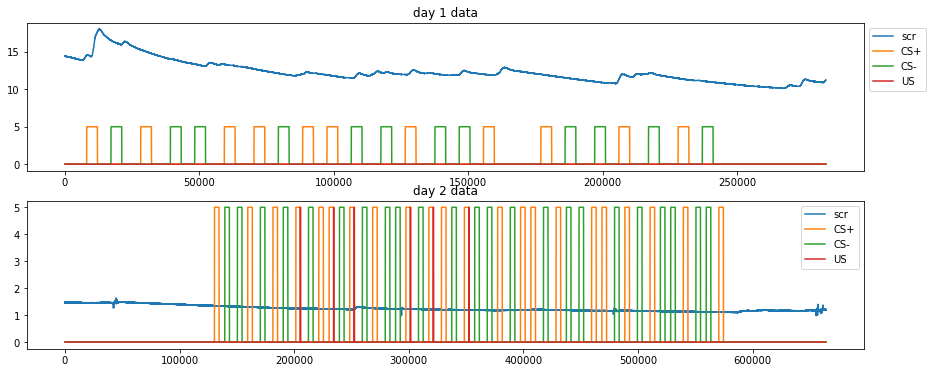

In [16]:
i_subject = 0

figure(figsize(15,6)); subplot(211); 
plot(raw_data[i_subject][0]); title('day 1 data')
legend(['scr','CS+','CS-','US'],bbox_to_anchor=(1, 1))

subplot(212); plot(raw_data[i_subject][1]); title('\nday 2 data'); 
legend(['scr','CS+','CS-','US'],bbox_to_anchor=(1, 1)); 


In [17]:
def stimulus_markers(CS):
    """Generate list of timepoints for stimuli onset and offset."""
    
    # delta marks transitions to and from a CS
    compareA = np.append(nonZero(CS),nonZero(CS)[-1])
    compareB = np.append(nonZero(CS)[0],nonZero(CS))
    delta = compareA - compareB

    # identify stimulus onsets 
    on = zeros(len(CS))
    on[compareA[nonZero(delta > 1)]] = 1
    on[compareA[0]] = 1

    # identify stimulus offsets
    off= zeros(len(CS))
    off[compareA[nonZero(delta > 1)-1]] = 1
    off[compareA[-1]] = 1

    return nonZero(on), nonZero(off)

### INSPECT CS+ AND CS- STIMULUS IDENTIFICATION ON A TEST SUBJECT

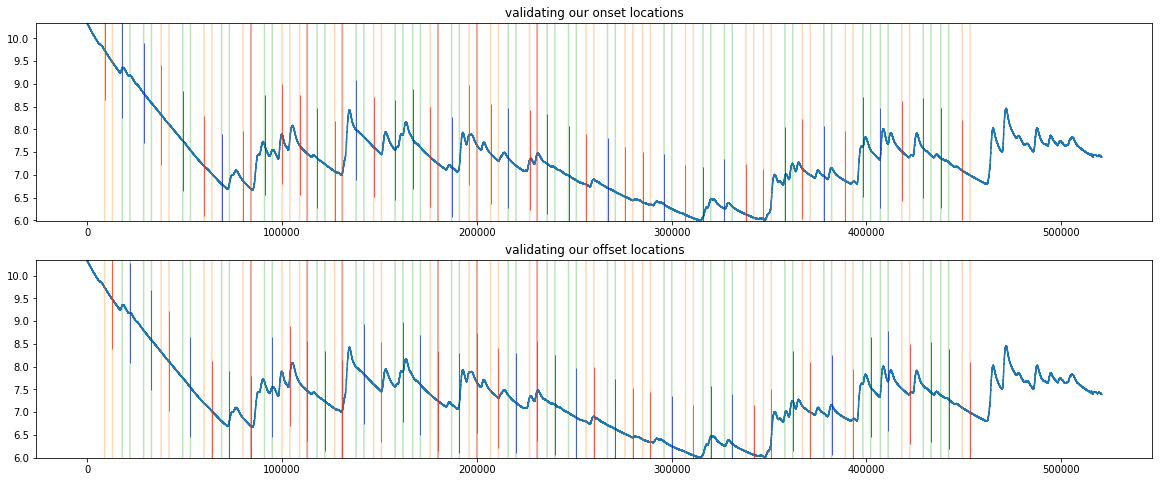

In [6]:
i_subject = 0  ; day = 0

# generate onset and offsets for each CS (pos and neg)
pos_onsets, pos_offsets = stimulus_markers(raw_data[i_subject][day][:,1])
neg_onsets, neg_offsets = stimulus_markers(raw_data[i_subject][day][:,2])

# plot scr data
figure(figsize(20,8))
subplot(211)
#plot locations of onsets 
plot(raw_data[i_subject][day][:,0])
plot(pos_onsets,raw_data[i_subject][day][pos_onsets,0],'r|',markersize=100,alpha=.7)
plot(neg_onsets,raw_data[i_subject][day][neg_onsets,0],'b|',markersize=100,alpha=.7)
plot(raw_data[i_subject][day][:,1:4]*5,alpha=.3)
ylim([min(raw_data[i_subject][day][:,0]),max(raw_data[i_subject][day][:,0])])
title('validating our onset locations')

# plot locations of offsets 
subplot(212)
plot(raw_data[i_subject][day][:,0])
plot(pos_offsets,raw_data[i_subject][day][pos_offsets,0],'r|',markersize=100,alpha=.7)
plot(neg_offsets,raw_data[i_subject][day][neg_offsets,0],'b|',markersize=100,alpha=.7)
plot(raw_data[i_subject][day][:,1:4]*5,alpha=.3)
ylim([min(raw_data[i_subject][day][:,0]),max(raw_data[i_subject][day][:,0])])
title('validating our offset locations'); 

### IDENTIFY US STIMULUS PRESENTATION 

In [7]:

i_subject = 0 ; day = 0

subject_data = raw_data[i_subject]
pos_onsets, pos_offsets = stimulus_markers(subject_data[day][:,1])
neg_onsets, neg_offsets = stimulus_markers(subject_data[day][:,2])
all_onsets = np.sort(np.concatenate([pos_onsets,neg_onsets]))

US = np.zeros(len(all_onsets))
USREF = np.zeros(len(all_onsets))

ucs_onsets, ucs_offsets = stimulus_markers(subject_data[day][:,3])
pos_onsets, pos_offsets = stimulus_markers(subject_data[day][:,1])

In [8]:
for iUS in range(0,len(ucs_onsets)): 
    difference = abs(all_onsets - ucs_offsets[iUS])
    US[np.nonzero(difference == min(difference))[0]] = 1

    differenceREF = abs(pos_onsets - ucs_offsets[iUS])
    USREF[np.nonzero(differenceREF == min(differenceREF))[0]] = 1
    

### INSPECT US IDENTIFICATION 

Text(0.5,1,u'validating our onset locations')

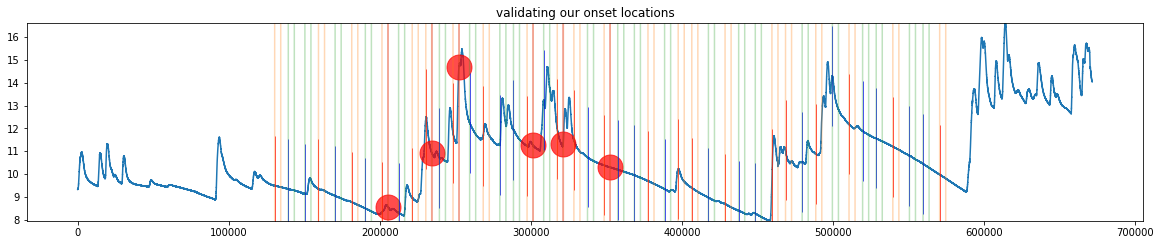

In [9]:
day = 0
i_subject = 8
subject_data = raw_data[i_subject]
# generate onset and offsets for each CS (pos and neg)
pos_onsets, pos_offsets = stimulus_markers(subject_data[day][:,1])
neg_onsets, neg_offsets = stimulus_markers(subject_data[day][:,2])
ucs_onsets, ucs_offsets = stimulus_markers(subject_data[day][:,3])

# plot scr data
figure(figsize(20,8))
subplot(211)
#plot locations of onsets 
plot(raw_data[i_subject][day][:,0])
plot(pos_onsets,subject_data[day][pos_onsets,0],'r|',markersize=100,alpha=.7)
plot(ucs_onsets,subject_data[day][ucs_onsets,0],'r.',markersize=50,alpha=.7)
plot(neg_onsets,subject_data[day][neg_onsets,0],'b|',markersize=100,alpha=.7)
plot(subject_data[day][:,1:4]*5,alpha=.3)
ylim([min(subject_data[day][:,0]),max(subject_data[day][:,0])])
title('validating our onset locations')

### EXTRACT STIMULI AND CREATE A DATA FRAME WITH RELEVENT INFORMATION

In [10]:

def design(raw_data, iSubject):
    """Create a data frame with the structure of the experiment. Necessary for modeling SCR data."""    
    
    def extract_design(raw_data, iSubject, day): 
        # identify positive and negative onsets across experiment -- only using onsets
        pos_onsets, null = stimulus_markers(raw_data[iSubject][day][:,1])
        neg_onsets, null = stimulus_markers(raw_data[iSubject][day][:,2])    
        
        # concatenate into a list and order 
        all_onsets = np.sort(np.concatenate([pos_onsets,neg_onsets]))
         
        # create placeholders
        CSpos = np.zeros(len(all_onsets))
        CSneg = np.zeros(len(all_onsets))
        US    = np.zeros(len(all_onsets))
        
        # for US
        if day == 0: 

            # identify locations for the US in the timecourse of the experiment
            us_onsets, us_offsets = stimulus_markers(raw_data[iSubject][day][:,3]) 
            # the '- 1' here is annoying, but necessary to automatically concatenate 
            # the two data frames in the right order ... 
            
            for eachUS in range(0,len(us_onsets)): 
                
                # find condition nearest to each US
                difference = abs(all_onsets - us_offsets[eachUS])
                # align timecourse differences with design placeholder 
                US[np.nonzero(difference == min(difference))[0]] = 1

        # for CS+ and CS-  
        for iOnset in range(0,len(all_onsets)): 
            
            CSpos[iOnset] = all_onsets[iOnset] in pos_onsets
            CSneg[iOnset] = all_onsets[iOnset] in neg_onsets
        
        # create a data frame with CS+, CS-, US, and the day
        structure = {'US':US, 'CS+': CSpos,'CS-':CSneg,'Day':repeat(day+1,len(all_onsets))}
        structure = pandas.DataFrame(structure) ; 
        # create column of indices for where event occured in scr timecourse         
        structure['CS_index'] = np.zeros(len(structure["CS+"]))
        structure['CS_index'][structure['CS+'] == 1] = pos_onsets 
        structure['CS_index'][structure['CS-'] == 1] = neg_onsets 
        
        return structure

    # determine the design on each day and concatenate the two
    design_day1 = extract_design(raw_data,iSubject,0)
    design_day2 = extract_design(raw_data,iSubject,1);
    design_full = pandas.concat([design_day1, design_day2])
    
    # clean up the fata frame
    design_full = design_full.reset_index()
    design_full.index.name = 'trial_number' # #    design_full.index += 1 ; 
    design_full['Day'] -= 1 # again, annoying, but because of the concatenation
    
    return design_full

### INSPECT DATA FRAME AND DESIGN STRUCTURE

In [11]:

test = design(raw_data, iSubject=0); test[0:15]


,index,CS+,CS-,Day,US,CS_index
trial_number,,,,,,
0,0,1.0,0.0,0,0.0,9013.0
1,1,0.0,1.0,0,0.0,18050.0
2,2,0.0,1.0,0,0.0,29053.0
3,3,1.0,0.0,0,0.0,38058.0
4,4,0.0,1.0,0,0.0,49079.0
5,5,1.0,0.0,0,0.0,60071.0
6,6,0.0,1.0,0,0.0,69071.0
7,7,1.0,0.0,0,1.0,80073.0
8,8,0.0,1.0,0,0.0,91085.0


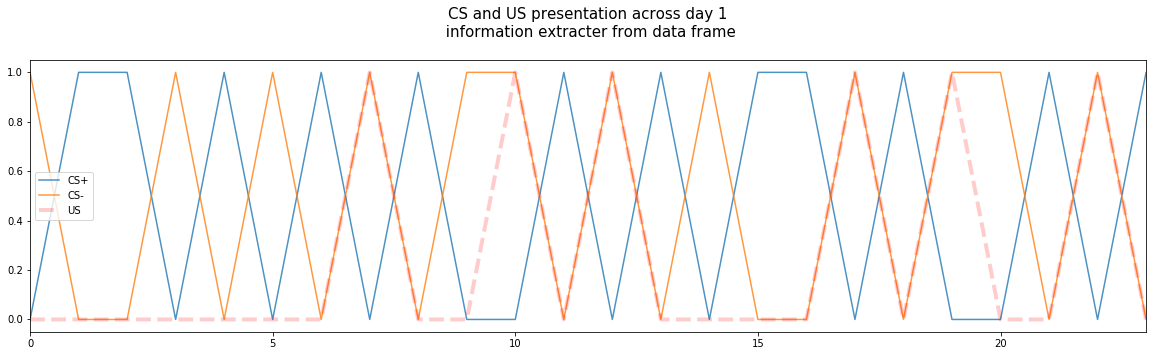

In [12]:
figure(figsize(20,5))
plot(test['CS-'],alpha=.8)
plot(test['CS+'],alpha=.8)
plot(test['US'],'r--',linewidth=4,alpha=.2)
legend(['CS+','CS-','US'])
xlim([0,sum(test['Day'] == 1)])
title('CS and US presentation across day 1\n information extracter from data frame\n', fontsize=15); 

### INSPECT ALIGNMENT BETWEEN DATAFRAME AND ORIGINAL DATA SCRUCTURE


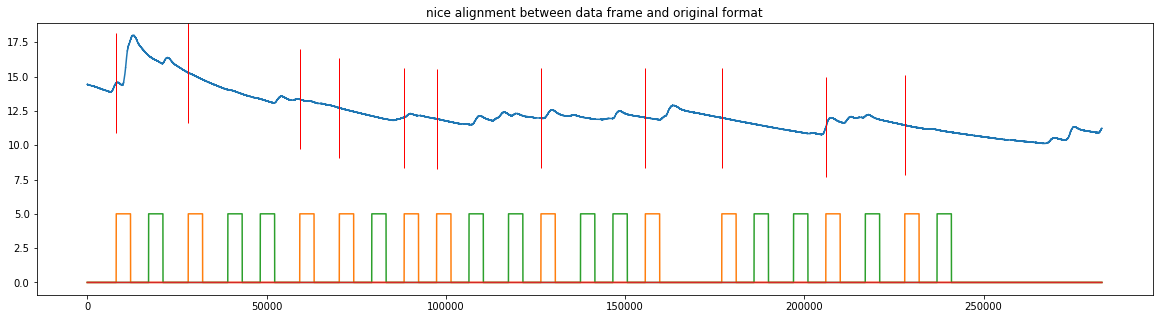

In [13]:
iSubject = 0 ; iDay = 1; CS_type = 'CS+'

data_design = design(raw_data, iSubject)
CS_locations = nonZero((data_design["Day"] == iDay) & (data_design[CS_type] == 1))

iIndex = data_design['CS_index'][CS_locations]
iIndex = iIndex.as_matrix()

plot(raw_data[iSubject][iDay]); 
plot(iIndex, raw_data[iSubject][iDay][iIndex.astype(int),0], 'r|', markersize=100)
#ylim([4.9,5.3])
title('nice alignment between data frame and original format'); 

### INSPECT AMPLITUDE EXTRACTION

Text(0.5,1,u'seems like everything is in order...')

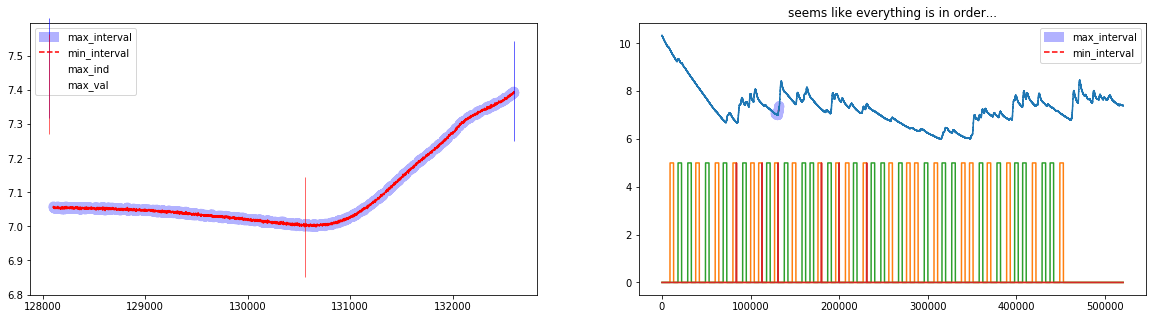

In [14]:
iSubject = 0 ; iDay = 0 ; CS_type = 'US' ; iStimulus = 2

subject_timecourse = raw_data[iSubject][iDay][:,0]
data_design = design(raw_data, iSubject)
CS_locations = nonZero((data_design["Day"] == iDay) & (data_design[CS_type] == 1))
iIndex = data_design['CS_index'][CS_locations]
iIndex = iIndex.as_matrix()

# begin 1 second after stimulus onset 
interval_length = 4.5
onset = int(iIndex[iStimulus]) + 1000
interval_length = int(interval_length * 1000)

# define interval to search over + find max value and index 
max_interval = subject_timecourse[onset: onset + interval_length]
max_index = onset + max_interval.argmax()
max_value = subject_timecourse[max_index]

# define interval from onset to max + find min index and value
min_interval = subject_timecourse[onset:max_index] # NOTE: in original code this didn't use the same (+ 1 second) onset as above ... 
min_index = onset + min_interval.argmin()
min_value = subject_timecourse[min_index]

subplot(121)
plot(range(onset,len(max_interval)+onset),max_interval,'b--',linewidth=10,alpha=.3)
plot(range(onset,len(min_interval)+onset),min_interval,'r--')
plot(max_index,max_value,'b|', markersize=100,alpha=.6)
plot(min_index,min_value,'r|', markersize=100,alpha=.6)
legend(['max_interval','min_interval','max_ind','max_val'])
ylim([min(max_interval)-.2,max(max_interval)+.2]); 

subplot(122)
plot(range(onset,len(max_interval)+onset),max_interval,'b--',linewidth=10,alpha=.3)
plot(range(onset,len(min_interval)+onset),min_interval,'r--')
plot(raw_data[iSubject][iDay]); 
legend(['max_interval','min_interval']); 
title('seems like everything is in order...')

In [15]:
def generate_onsets(design_matrix,iDay,CS_type):
    """Find onsets of a given CS type, on a given day, within the design matrix."""

    # find CS_type locations with the design that are on iDay
    CS_locations_TMP = nonZero((design_matrix["Day"] == iDay) & (design_matrix[CS_type] == 1))
    
    # find indices of CS_type within design
    indices = np.array(design_matrix['CS_index'][CS_locations_TMP])
    
    return indices

In [49]:
def amplitude(subject_timecourse,onset): 
    """Find SCR amplitude from the onset of a CS over a given interval."""

    initial_delay = 1                             # length of wait time after onset
    interval_length = 4.5                         # length of interval to search over
    interval_length = int(interval_length * 1000) # convert to ms
    onset = onset + initial_delay * 1000          # convert to ms 
    
    # define interval to search over + find max value and index 
    max_interval = subject_timecourse[onset: onset + interval_length]
    max_index = onset + max_interval.argmax()
    max_value = subject_timecourse[max_index]

    # define interval from onset to max + find min index and value
    min_interval = subject_timecourse[onset:max_index+1] # "+ 1" in case onset is the maximum
    min_index = onset + min_interval.argmin()
    min_value = subject_timecourse[min_index]
    
    return max_interval, max_index, max_value, min_interval, min_index, min_value #for debugging/visualization
    #return max_value - min_value

### INSPECT generate_onsets( ) AND amplitude( ) FUNCTIONS 

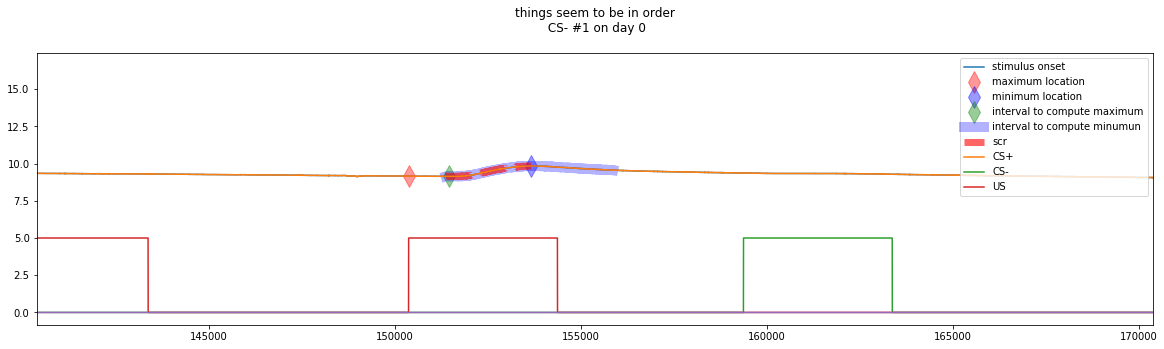

In [50]:
iDay = 0; iSubject = 8; iStimulus = 1 ; CS_type = 'CS-'

# generate design matrix and extract onsets of CS_type
design_matrix = design(raw_data, iSubject)
onsets = generate_onsets(design_matrix,iDay,CS_type)

# identify the max and min interval, values, and indices of iStimulus of CS_type
onset = int(onsets[iStimulus])
subject_timecourse = raw_data[iSubject][iDay][:,0]

plot(subject_timecourse)
max_int, max_i, max_v, min_int, min_i, min_v = amplitude(subject_timecourse,int(onset))
original_onset = np.copy(onset)
original_onset = int(original_onset)
onset = onset + 1000


plot(original_onset, raw_data[iSubject][iDay][original_onset,0],'rd',markersize=15,alpha=.4)
plot(max_i, raw_data[iSubject][iDay][max_i,0],'bd',markersize=15,alpha=.4)
plot(min_i, raw_data[iSubject][iDay][min_i,0],'gd',markersize=15,alpha=.4)
plot(range(onset,len(max_int)+onset),max_int,'b',linewidth=10,alpha=.3)
plot(range(onset,len(min_int)+onset),min_int,'r--',linewidth=7,alpha=.6)
plot(raw_data[iSubject][iDay])

legend(['stimulus onset','maximum location','minimum location','interval to compute maximum','interval to compute minumun','scr','CS+','CS-','US']); 
xlim([original_onset-10000,original_onset+20000])
title('things seem to be in order\n %s #%d on day %d\n'%(CS_type,iStimulus,iDay)); 

### VALIDATE INCLUSION OF US IN DATA

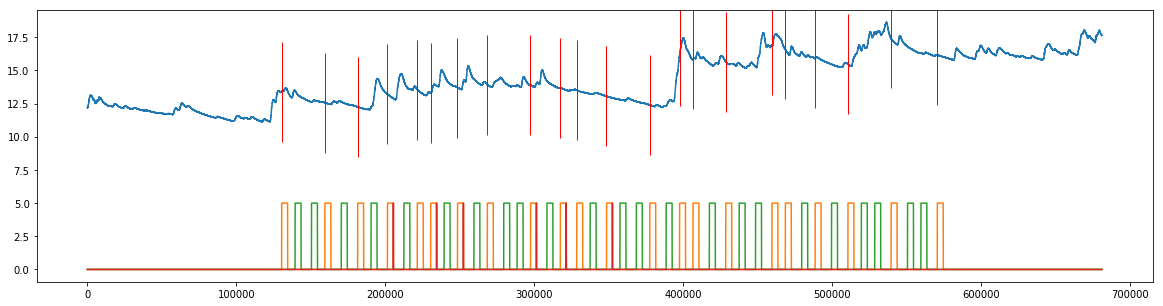

In [51]:
iDay = 0  ; i_subject = 4  ; iStimulus = 2 ; CS_type = 'US'

subjectSCR = raw_data[i_subject][iDay][:,0]
design_matrix = design(raw_data,i_subject)
tmpINT = design_matrix.CS_index[(design_matrix['Day'].values == 0) & (design_matrix['CS+'].values ==1 )].values

plot(raw_data[i_subject][iDay])
plot(tmpINT.astype(int), subjectSCR[tmpINT.astype(int)],'r|',markersize=100);

### INCLUDE US STIMULI INTO THE DATA FRAME 

In [52]:
def design_single(raw_data, iSubject):
    """Create a data frame with the structure and time indices of experimental stimuli."""    
    
    def extract_design(raw_data, iSubject, day): 
        # identify positive and negative onsets across experiment -- only using onsets
        pos_onsets, null = stimulus_markers(raw_data[iSubject][day][:,1])
        neg_onsets, null = stimulus_markers(raw_data[iSubject][day][:,2])    
        
        # concatenate into a list and order 
        all_onsets = np.sort(np.concatenate([pos_onsets,neg_onsets]))
         
        # create placeholders
        CSpos = np.zeros(len(all_onsets))
        CSneg = np.zeros(len(all_onsets))
        US    = np.zeros(len(all_onsets))

        # for CS+ and CS- on both days
        for iOnset in range(0,len(all_onsets)): 
            # 
            CSpos[iOnset] = all_onsets[iOnset] in pos_onsets
            CSneg[iOnset] = all_onsets[iOnset] in neg_onsets        
            
        # create a data frame with CS+, CS-, US, and the day
        structure = {'US':US, 'CS+': CSpos,'CS-':CSneg,'Day':repeat(day+1,len(all_onsets))}
        structure = pandas.DataFrame(structure) ; 
        
        # create column of indices for where event occured in scr timecourse         
        structure['CS_index'] = np.zeros(len(structure["CS+"]))
        structure['CS_index'][structure['CS+'] == 1] = pos_onsets 
        structure['CS_index'][structure['CS-'] == 1] = neg_onsets 
        structure['US_index'] = np.zeros(len(structure["US"]))
        
        # on day one, fill in the locations for the US
        if day == 0: 

            # identify locations for the US in the timecourse of the experiment
            us_onsets, us_offsets = stimulus_markers(raw_data[iSubject][day][:,3]) 
            
            # extract time of onset nearst to each US            
            for eachUS in range(0,len(us_onsets)): 
                
                # find condition nearest to each US
                difference = abs(all_onsets - us_offsets[eachUS])
                # align timecourse differences with design placeholder 
                US[np.nonzero(difference == min(difference))[0]] = 1
            
            structure['US'] = US
            structure['US_index'][structure['US'] == 1] = us_onsets 
        
        return structure
    
    # determine the design on each day and concatenate the two
    design_day1 = extract_design(raw_data,iSubject,0)
    design_day2 = extract_design(raw_data,iSubject,1);
    design_full = pandas.concat([design_day1, design_day2])
    
    # clean up the fata frame
    design_full = design_full.reset_index() #range(0,len(design_full['CS+']))
    design_full.index.name = 'trial_number' # #    design_full.index += 1 ; 
    design_full['Day'] -= 1 # again, annoying, but because of the concatenation
    
    return design_full

In [53]:
design_matrix = design_single(raw_data,iSubject) 

### VALIDATE INCLUSION OF US IN DATA

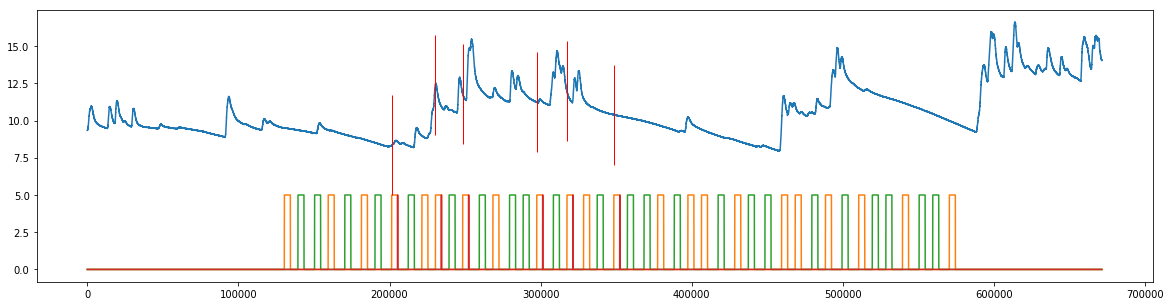

In [54]:
iDay = 0 ; i_subject = 8;  CS_type = 'US'

subjectSCR = raw_data[i_subject][iDay][:,0]
design_matrix = design_single(raw_data,i_subject)
tmpINT = design_matrix.CS_index[(design_matrix['Day'].values == iDay) & (design_matrix[CS_type].values == 1 )].values
tmpINT = tmpINT.astype(int)
plot(raw_data[i_subject][iDay])
plot(tmpINT, subjectSCR[tmpINT],'r|',markersize=100);

### VALIDATE INCLUSION OF US IN DATA

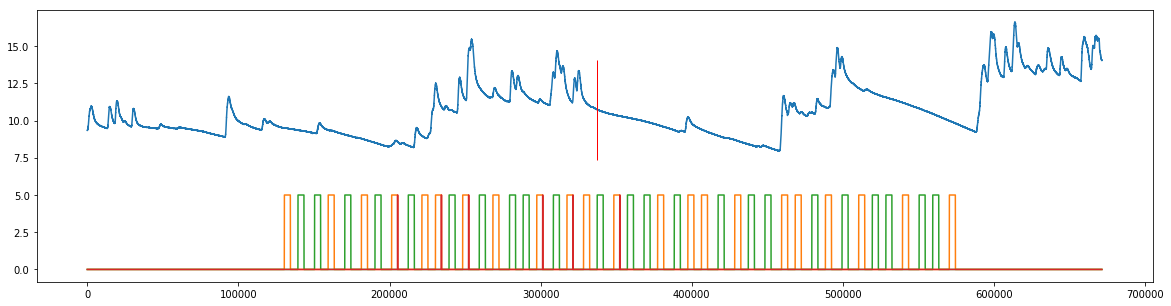

In [55]:
iDay = 0 ; i_subject = 8;  CS_type = 'CS-'; i_stim = 10

subjectSCR = raw_data[i_subject][iDay][:,0]
design_matrix = design_single(raw_data,i_subject)
tmpINT = design_matrix.CS_index[(design_matrix['Day'].values == iDay) & (design_matrix[CS_type].values == 1 )].values
tmpINT = tmpINT.astype(int)
plot(raw_data[i_subject][iDay])
plot(tmpINT[i_stim], subjectSCR[tmpINT][i_stim],'r|',markersize=100);

### INCLUDE US STIMULI INTO THE DATA FRAME AND ENABLE FOR MULTIPLE SUBJECTS 

In [56]:
def design_(raw_data):
    """Create a data frame with the structure and time indices of experimental stimuli."""    
    
    nSubjects = len(raw_data)
    all_subjects_design = {}
    
    for iSubject in range(0,nSubjects): 
        
        # determine the design on each day and concatenate the two
        design_day1 = extract_design(raw_data[iSubject],0)
        design_day2 = extract_design(raw_data[iSubject],1);
        design_full = pandas.concat([design_day1, design_day2])

        # clean up the fata frame
        design_full = design_full.reset_index() # range(0,len(design_full['CS+']))
        design_full.index.name = 'trial_number' # #    design_full.index += 1 ; 
        design_full['Day'] -= 1 # again, annoying, but because of the concatenation
        all_subjects_design[iSubject] = design_full

    return all_subjects_design


def extract_design(subject_data, day): 
    
    # identify positive and negative onsets across experiment -- only using onsets
    pos_onsets, null = stimulus_markers(subject_data[day][:,1])
    neg_onsets, null = stimulus_markers(subject_data[day][:,2])    
    
    # concatenate into a list and order 
    all_onsets = np.sort(np.concatenate([pos_onsets,neg_onsets]))

    # create placeholders
    CSpos = np.zeros(len(all_onsets))
    CSneg = np.zeros(len(all_onsets))
    US    = np.zeros(len(all_onsets))

    # for CS+ and CS- on both days
    for iOnset in range(0,len(all_onsets)): 
        
        CSpos[iOnset] = all_onsets[iOnset] in pos_onsets
        CSneg[iOnset] = all_onsets[iOnset] in neg_onsets        

    # create a data frame with CS+, CS-, US, and the day
    structure = {'US':US, 'CS+': CSpos,'CS-':CSneg,'Day':repeat(day+1,len(all_onsets))}
    structure = pandas.DataFrame(structure) ; 

    # create column of indices for where event occured in scr timecourse         
    structure['CS_index'] = np.zeros(len(structure["CS+"]))
    structure['CS_index'][structure['CS+'] == 1] = pos_onsets 
    structure['CS_index'][structure['CS-'] == 1] = neg_onsets 
    structure['US_index'] = np.zeros(len(structure["US"]))

    # on day one, fill in the locations for the US
    if day == 0: 

        # identify locations for the US in the timecourse of the experiment
        us_onsets, us_offsets = stimulus_markers(subject_data[day][:,3]) 

        # extract time of onset nearst to each US            
        for eachUS in range(0,len(us_onsets)): 

            # find condition nearest to each US
            difference = abs(all_onsets - us_offsets[eachUS])
            # align timecourse differences with design placeholder 
            US[np.nonzero(difference == min(difference))[0]] = 1

        structure['US'] = US
        structure['US_index'][structure['US'] == 1] = us_onsets 

    return structure

In [57]:
path2data = os.getcwd() + '/data_physio_study1/'
raw_data = loadData(path2data)

loading data for s_01
loading data for s_02
loading data for s_03
loading data for s_04
loading data for s_05
loading data for s_06
loading data for s_07
loading data for s_08
loading data for s_09
loading data for s_10


### VALIDATE INCLUSION OF US IN DATA

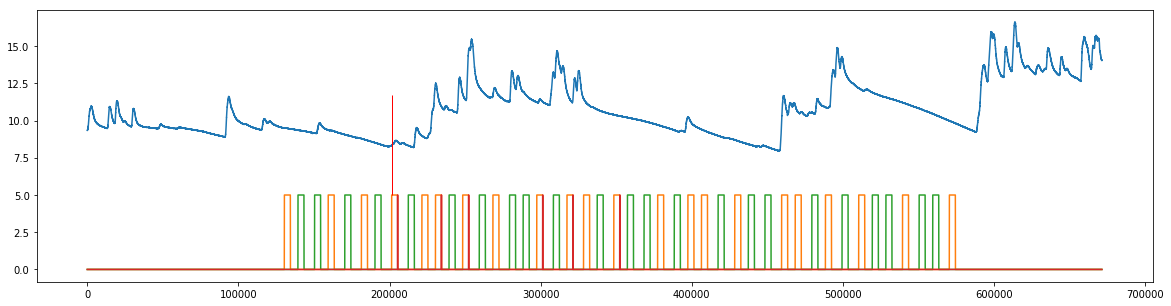

In [58]:
iDay = 0 ; i_subject = 8;  CS_type = 'US'; i_stim = 0

subjectSCR = raw_data[i_subject][iDay][:,0]
design_matrix = design_(raw_data)
d1 = design_matrix[i_subject]

tmpINT = d1.CS_index[(d1['Day'].values == iDay) & (d1[CS_type].values == 1 )].values
tmpINT = tmpINT.astype(int)
plot(raw_data[i_subject][iDay])
plot(tmpINT[i_stim], subjectSCR[tmpINT][i_stim],'r|',markersize=100);

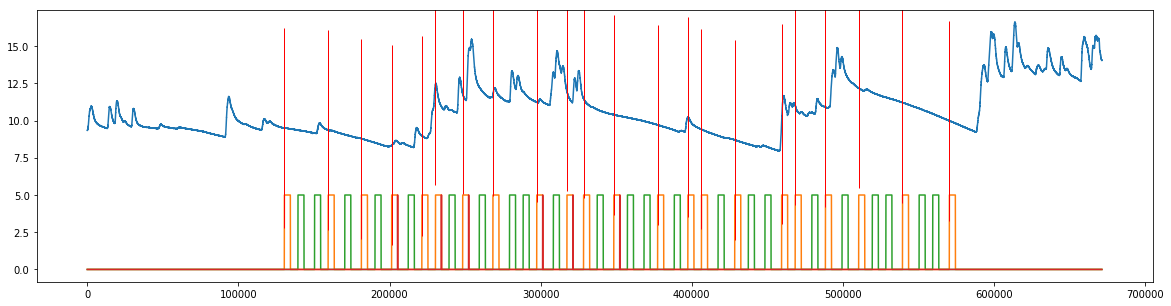

In [59]:
# VALIDATE INCLUSION OF US IN DATA

iDay = 0 ; i_subject = 8;  CS_type = 'CS+'; i_stim = 0

subjectSCR = raw_data[i_subject][iDay][:,0]
design_matrix = design_(raw_data)
d1 = design_matrix[i_subject]

tmpINT = d1.CS_index[(d1['Day'].values == iDay) & (d1[CS_type].values == 1 )].values
tmpINT = tmpINT.astype(int)
plot(raw_data[i_subject][iDay])
plot(tmpINT, subjectSCR[tmpINT],'r|',markersize=200);

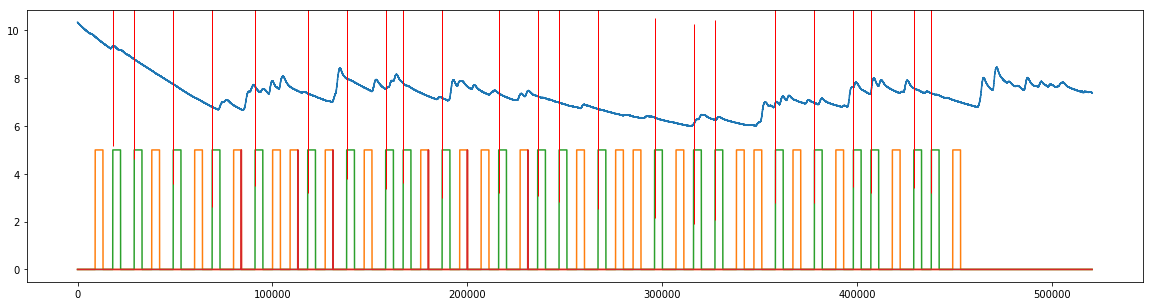

In [60]:
iDay = 0 ; iSubject = 0  ; iStimulus = 0 ; stim_type = 'CS-'

d2 = design_matrix[iSubject]
tmpINT = d2.CS_index[(d2[stim_type].values == 1) & (d2['Day'].values == iDay)].values
subjectSCR = raw_data[iSubject][iDay][:,0]

plot(raw_data[iSubject][iDay])
plot(tmpINT.astype(int), subjectSCR[tmpINT.astype(int)], 'r|',markersize=200);

In [61]:
# INSPECT generate_onsets() AND amplitude() FUNCTIONS 

# generate design matrix and extract onsets of CS_type
design_matrix = design_(raw_data)


0.06714


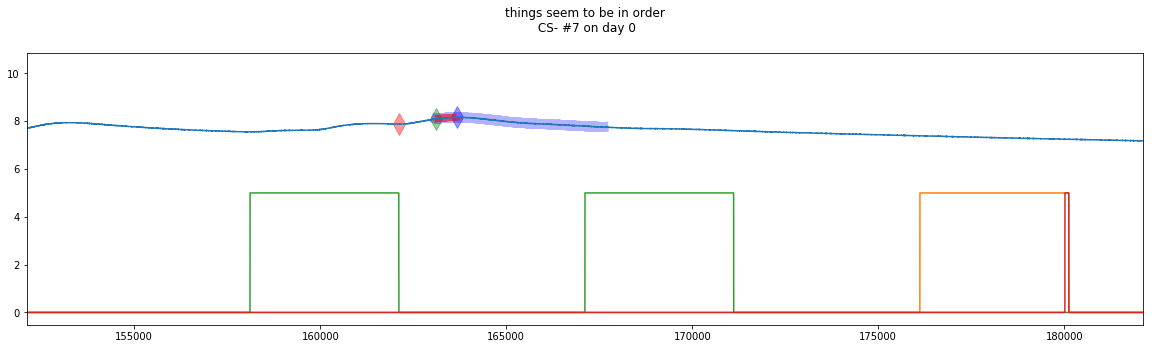

In [62]:

i_subject = 0; iStimulus = 7 ; CS_type = 'CS-' ; iDay = 0

d1 = design_matrix[i_subject]
onsets = d1['CS_index'][nonZero(d1[CS_type].values)].values + 4000 # add 4000 to get offsets

# identify the max and min interval, values, and indices of iStimulus of CS_type
onset = int(onsets[iStimulus])
subject_timecourse = raw_data[i_subject][iDay][:,0]
max_int, max_i, max_v, min_int, min_i, min_v = amplitude(subject_timecourse,onset)
print(max_v - min_v)

original_onset = np.copy(onset)
original_onset = int(original_onset)
onset = onset + 1000

plot(original_onset, raw_data[i_subject][iDay][original_onset,0],'rd',markersize=15,alpha=.4)
plot(max_i, raw_data[i_subject][iDay][max_i,0],'bd',markersize=15,alpha=.4)
plot(min_i, raw_data[i_subject][iDay][min_i,0],'gd',markersize=15,alpha=.4)
plot(range(onset,len(max_int)+onset),max_int,'b',linewidth=10,alpha=.3)
plot(range(onset,len(min_int)+onset),min_int,'r--',linewidth=7,alpha=.6)
plot(raw_data[i_subject][iDay])

# legend(['stimulus onset','maximum location','minimum location','interval to compute maximum','interval to compute minumun','scr','CS+','CS-','US']); 
xlim([original_onset-10000,original_onset+20000])
title('things seem to be in order\n %s #%d on day %d\n'%(CS_type,iStimulus,iDay)); 

In [63]:

i_subject = 0; iStimulus = 7 ; CS_type = 'CS-' ; iDay = 0

d1 = design_matrix[i_subject]
d1['SCR_amplitude'] = np.zeros(len(d1))
subject_timecourse = raw_data[i_subject][iDay][:,0]
onsets = d1['CS_index'][nonZero(d1[CS_type].values)].values + 4000 # add 4000 to get offsets

for i_onset in range(0,len(onsets)):

    # identify the max and min interval, values, and indices of iStimulus of CS_type
    onset = int(onsets[i_onset])    
    max_int, max_i, max_v, min_int, min_i, min_v = amplitude(subject_timecourse,onset)
    d1['SCR_amplitude'][i_onset] = max_v - min_v 
    

# SETTING UP FINAL FUNCTION

In [64]:
# $ source activate scr_analysis
% pylab inline
from pandas import read_csv
import seaborn as sns
import numpy as np
import pandas
import os 

# let's turn off these error messages : https://tinyurl.com/ybduhkh3
pandas.options.mode.chained_assignment = None
sns.set()

Populating the interactive namespace from numpy and matplotlib


/Users/ssnl_booth2/anaconda/envs/experimental/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [65]:
# EXTRACT DATA 

def loadData(path2data):
    """ 
    Load BIOPAC data converted to .txt files. Returns: 
    rawData[iSubject][iDay][:,iChannel], where 
    iChannel [0,1,2,3] are [scr, cs+, cs-, us] respectively
    """

    rawData = []
    tmpFiles = os.listdir(path2data)[1:-1]
    for iFile in range(0,10): #int(len(tmpFiles)/2)):
        if 's_' in tmpFiles[ iFile * 2 ]: 
            print "loading data for",tmpFiles[iFile * 2][0:4]
            tmp1 = read_csv('%s/%s'%(path2data,tmpFiles[ iFile * 2  ]), sep=',',header=None)
            tmp2 = read_csv('%s/%s'%(path2data,tmpFiles[iFile *2 + 1]), sep=',',header=None)
            rawData.append([tmp1.values, tmp2.values])


    return rawData

def nonZero(x): 
    """Make the code cleaner below"""
    return np.nonzero(x)[0]

In [66]:
# LOAD DATA

path2data = os.getcwd() + '/data_physio_study1/'
raw_data = loadData(path2data)


loading data for s_01
loading data for s_02
loading data for s_03
loading data for s_04
loading data for s_05
loading data for s_06
loading data for s_07
loading data for s_08
loading data for s_09
loading data for s_10


In [67]:
def stimulus_markers(CS):
    """Generate list of timepoints for stimuli onset and offset."""
    
    # delta marks transitions to and from a CS
    compareA = np.append(nonZero(CS),nonZero(CS)[-1])
    compareB = np.append(nonZero(CS)[0],nonZero(CS))
    delta = compareA - compareB

    # identify stimulus onsets 
    on = zeros(len(CS))
    on[compareA[nonZero(delta > 1)]] = 1
    on[compareA[0]] = 1

    # identify stimulus offsets
    off= zeros(len(CS))
    off[compareA[nonZero(delta > 1)-1]] = 1
    off[compareA[-1]] = 1

    return nonZero(on), nonZero(off)

In [68]:
def design_scr_amp(raw_data):
    """Create a data frame with the structure and time indices of experimental stimuli."""    
    
    nSubjects = len(raw_data)
    all_subjects_design = {}
    
    for iSubject in range(0,nSubjects): 
        
        # determine the design on each day and concatenate the two
        design_day1 = extract_design(raw_data[iSubject],0)
        design_day2 = extract_design(raw_data[iSubject],1);
        design_full = pandas.concat([design_day1, design_day2])

        # clean up the fata frame
        design_full = design_full.reset_index() # range(0,len(design_full['CS+']))
        design_full.index.name = 'trial_number' # #    design_full.index += 1 ; 
        design_full['Day'] -= 1 # again, annoying, but because of the concatenation
        all_subjects_design[iSubject] = design_full

    return all_subjects_design


def extract_design(subject_data, day): 
    
    # identify positive and negative onsets across experiment -- only using onsets
    pos_onsets, null = stimulus_markers(subject_data[day][:,1])
    neg_onsets, null = stimulus_markers(subject_data[day][:,2])    
    
    # concatenate into a list and order 
    all_onsets = np.sort(np.concatenate([pos_onsets,neg_onsets]))
    
    # prepare to find amplitudes for each CS
    scr = subject_data[day][:,0]
    scr_amp = np.zeros(len(all_onsets))
    
    # create placeholders
    CS_pos = np.zeros(len(all_onsets))
    CS_neg = np.zeros(len(all_onsets))
    US    = np.zeros(len(all_onsets))

    # set markers for CS+ or CS- in design 
    for iOnset in range(0,len(all_onsets)): 
        
        CS_pos[iOnset] = all_onsets[iOnset] in pos_onsets
        CS_neg[iOnset] = all_onsets[iOnset] in neg_onsets
        scr_amp[iOnset] = amplitude(scr, all_onsets[iOnset])
    

    # create a data frame with CS+, CS-, US, and the day
    structure = {'US':US, 'CS+': CS_pos, 'CS-':CS_neg, 'SCR_amp':scr_amp, 'Day':repeat(day+1,len(all_onsets))}
    structure = pandas.DataFrame(structure) ; 

    # create column of indices for where event occured in scr timecourse         
    structure['CS_index'] = np.zeros(len(structure["CS+"]))
    structure['CS_index'][structure['CS+'] == 1] = pos_onsets 
    structure['CS_index'][structure['CS-'] == 1] = neg_onsets 
    structure['US_index'] = np.zeros(len(structure["US"]))

    # on day one, fill in the locations for the US
    if day == 0: 

        # identify locations for the US in the timecourse of the experiment
        us_onsets, us_offsets = stimulus_markers(subject_data[day][:,3]) 

        # extract time of onset nearst to each US            
        for eachUS in range(0,len(us_onsets)): 

            # find condition nearest to each US
            difference = abs(all_onsets - us_offsets[eachUS])
            # align timecourse differences with design placeholder 
            US[np.nonzero(difference == min(difference))[0]] = 1
            
            # TO DO: also calculate amplitude here

        structure['US'] = US
        structure['US_index'][structure['US'] == 1] = us_onsets 

    return structure

def amplitude(subject_timecourse,onset): 
    """Find SCR amplitude from the onset of a CS over a given interval."""

    initial_delay = 1                             # length of wait time after onset
    interval_length = 4.5                         # length of interval to search over
    interval_length = int(interval_length * 1000) # convert to ms
    onset = onset + initial_delay * 1000          # convert to ms 
    
    # define interval to search over + find max value and index 
    max_interval = subject_timecourse[onset: onset + interval_length]
    max_index = onset + max_interval.argmax()
    max_value = subject_timecourse[max_index]

    # define interval from onset to max + find min index and value
    min_interval = subject_timecourse[onset:max_index+1] # "+ 1" in case onset is the maximum
    min_index = onset + min_interval.argmin()
    min_value = subject_timecourse[min_index]
    
    # return max_interval, max_index, max_value, min_interval, min_index, min_value for debugging/visualization
    return max_value - min_value

In [69]:
# generate design matrix and extract onsets of CS_type
design_matrix = design_scr_amp(raw_data)

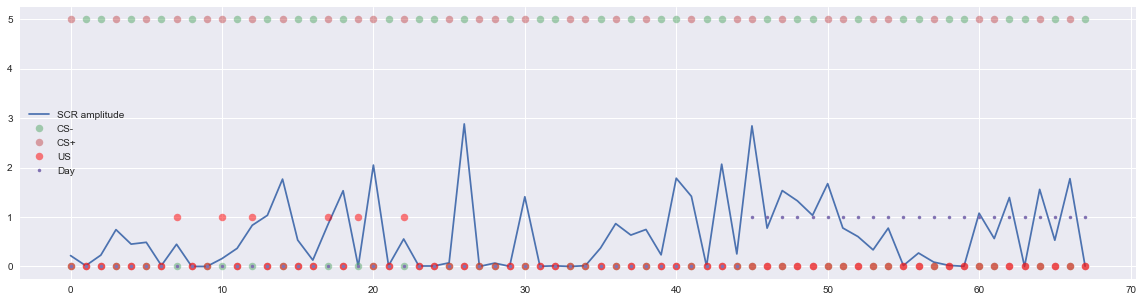

In [70]:
i_subject = 9
figure(figsize=(20,5))
plot(design_matrix[i_subject]['SCR_amp']*2)
plot(design_matrix[i_subject]['CS-']*5,'.',markersize=15,alpha=.5)
plot(design_matrix[i_subject]['CS+']*5,'.',markersize=15,alpha=.5)
plot(design_matrix[i_subject]['US'],'r.',markersize=15,alpha=.5)
plot(design_matrix[i_subject]['Day'], '.')
legend(['SCR amplitude', 'CS-', 'CS+', 'US','Day'])

## test loading the function we've made

The only thing we've changed is removed some of the outputs from the amplitude function. those were just helping us debug. 

In [71]:
% pylab inline
import numpy as np
from scr_analysis_functions import * 
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [72]:
path2data = os.getcwd() + '/data_physio_study1/'
raw_data = loadData(path2data)

loading data for s_01
loading data for s_02
loading data for s_03
loading data for s_04
loading data for s_05
loading data for s_06
loading data for s_07
loading data for s_08
loading data for s_09
loading data for s_10
loading data for s_11
loading data for s_12
loading data for s_13
loading data for s_14
loading data for s_15
loading data for s_16
loading data for s_17
loading data for s_18
loading data for s_19
loading data for s_20
loading data for s_21
loading data for s_22
loading data for s_23
loading data for s_24
loading data for s_25
loading data for s_26
loading data for s_27
loading data for s_28
loading data for s_29
loading data for s_30
loading data for s_31
loading data for s_32
loading data for s_33
loading data for s_34
loading data for s_35
loading data for s_36
loading data for s_37
loading data for s_38
loading data for s_39
loading data for s_40
loading data for s_41
loading data for s_42
loading data for s_43
loading data for s_44


In [73]:
design_matrix = design(raw_data)

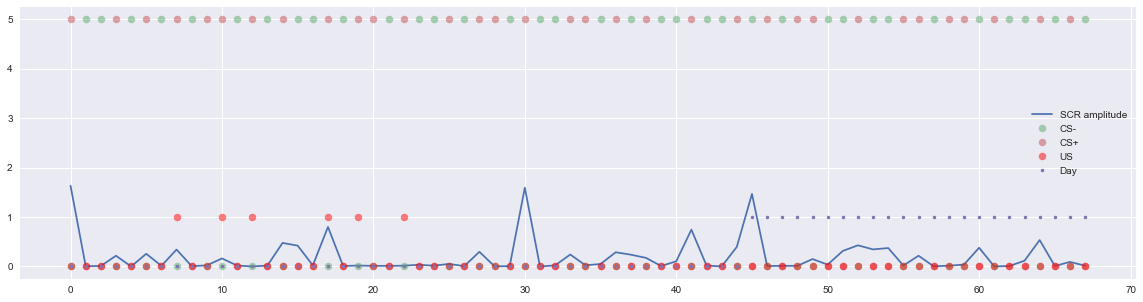

In [74]:
i_subject = 35

figure(figsize=(20,5))
plot(design_matrix[i_subject]['SCR_amp']*2)
plot(design_matrix[i_subject]['CS-']*5,'.',markersize=15,alpha=.5)
plot(design_matrix[i_subject]['CS+']*5,'.',markersize=15,alpha=.5)
plot(design_matrix[i_subject]['US'],'r.',markersize=15,alpha=.5)
plot(design_matrix[i_subject]['Day'], '.')
legend(['SCR amplitude', 'CS-', 'CS+', 'US','Day'])

In [77]:
n_subjects = len(design_matrix)
n_CSs = len(design_matrix[0]['CS_index'])

scr_population = np.zeros([n_subjects, n_CSs])

for i_subject in range(0, n_subjects):
    scr_population[i_subject, :] = design_matrix[i_subject]['SCR_amp']

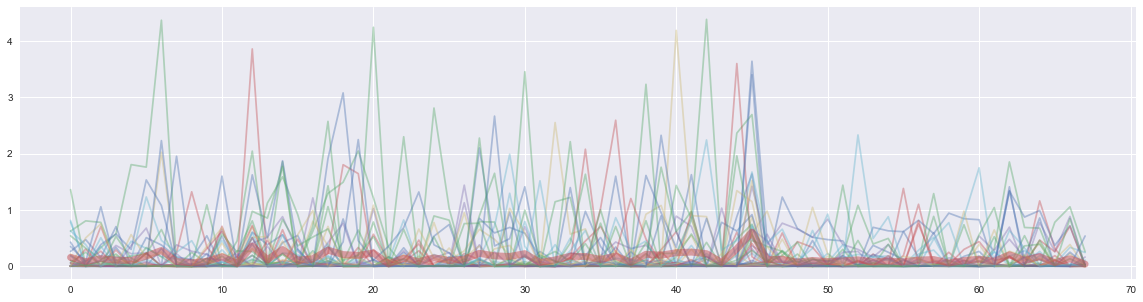

In [76]:
sns.set()
figure(figsize=(20, 5))

sns.color_palette(sns.cubehelix_palette(8))

plot(scr_population.T, alpha=.4); 
plot(mean(scr_population,0), linewidth=7, alpha=.5); 

In [ ]:
# kinda looks like trash ... let's run some validations next